# initial data exploration


In [11]:
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [12]:
connection = sqlalchemy.create_engine("postgresql://tcosse:mysecretpassword@db_container:5432/piscineds")

In [13]:
data = pd.read_sql_query("SELECT event_time, user_id, price, user_session from customers where event_type = 'purchase'", con=connection)

## Line Chart

In [14]:
mean = data['price'].mean()
count = data['price'].count()
std = data['price'].std()
min = data['price'].min()
quart = data['price'].quantile(0.25)
mid = data['price'].quantile(0.50)
tier = data['price'].quantile(0.75)
max = data['price'].max()

In [15]:
print("count: {}".format(count))
print("mean: {}".format(mean))
print("std: {}".format(std))
print("min: {}".format(min))
print("quart: {}".format(quart))
print("mid: {}".format(mid))
print("tier: {}".format(tier))
print("max: {}".format(max))

count: 1044216
mean: 4.921001564810346
std: 8.854084680982037
min: -79.37
quart: 1.59
mid: 3.0
tier: 5.4
max: 327.78


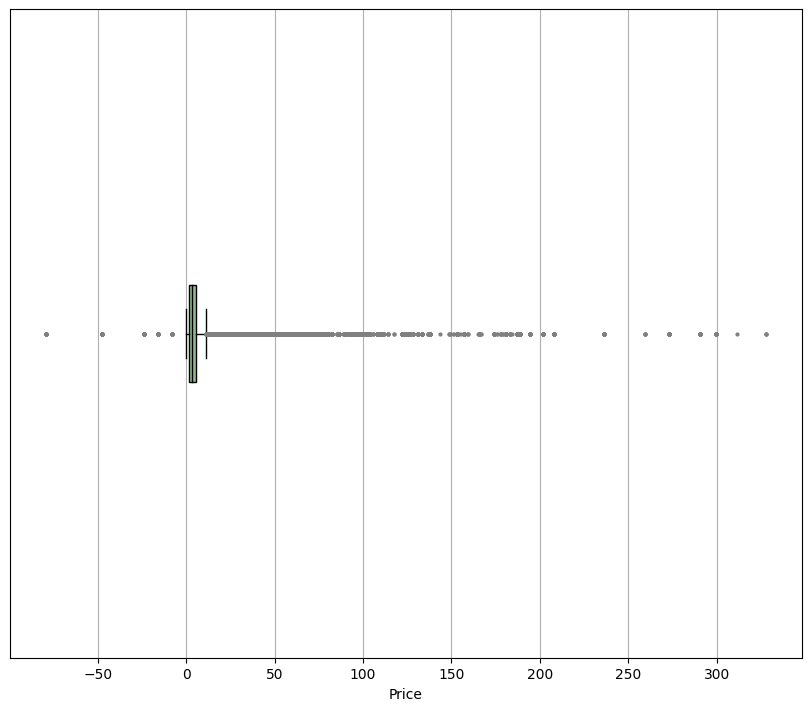

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7), layout='constrained')

flierprops = dict(marker='o', markerfacecolor='grey', markersize=2,
              markeredgecolor='grey')
medianprops = dict(linestyle='-', color='black')
box = ax.boxplot(data['price'], zorder=3, vert=False, medianprops = medianprops, flierprops=flierprops, patch_artist=True)

for b in box['boxes']:
    b.set_facecolor('darkseagreen')
ax.set_xlabel('Price')
ax.set_yticks([])
ax.grid(True, zorder=0)

plt.show()

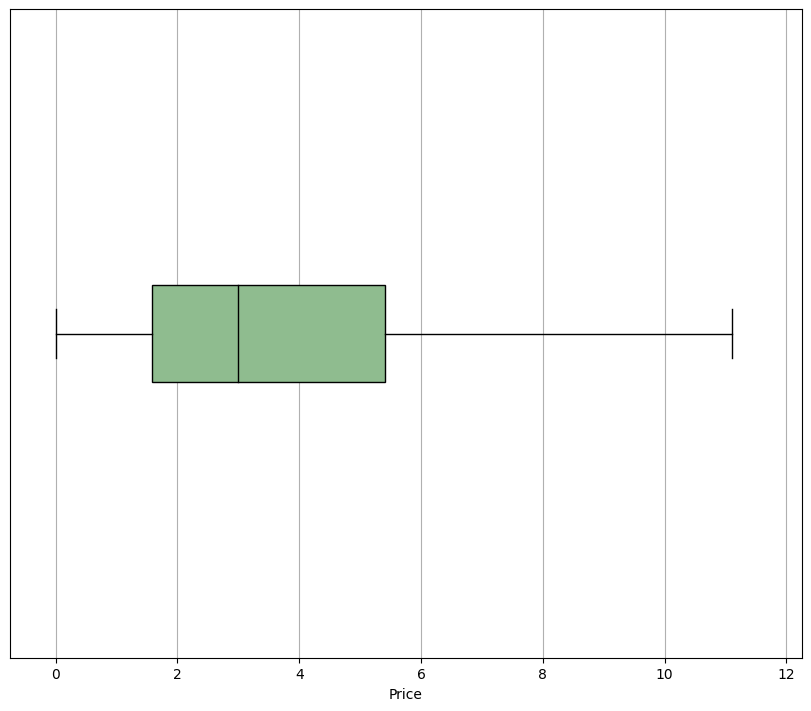

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7), layout='constrained')

flierprops = dict(marker='o', markerfacecolor='grey', markersize=2,
              markeredgecolor='grey')
medianprops = dict(linestyle='-', color='black')
box = ax.boxplot(data['price'], zorder=3, vert=False, medianprops = medianprops, showfliers=False, patch_artist=True)

for b in box['boxes']:
    b.set_facecolor('darkseagreen')
ax.set_xlabel('Price')
ax.set_yticks([])
ax.grid(True, zorder=0)
ax.set_xlim(-0.75, 12.25 )
ax.set_xticks(range(0, 14, 2))

plt.show()

        user_id  avg_cart_price
0      33805090       31.350000
1      55849756       33.503333
2      60573768       35.988571
3      62955850       27.680000
4      92381432       33.590000
...         ...             ...
6649  608739991       26.980000
6650  608747265       32.063333
6651  608773928       42.060000
6652  608799398       27.060000
6653  608810037       40.480000

[6654 rows x 2 columns]


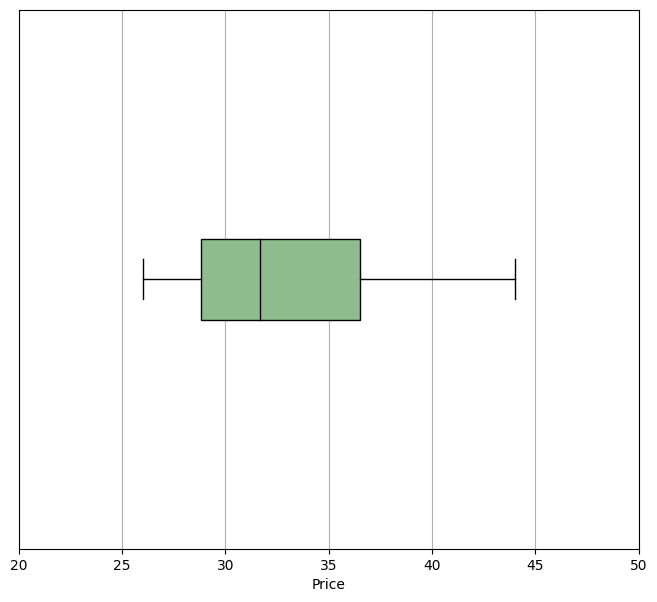

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7))

data = pd.read_sql_query("SELECT user_id, AVG(price) AS avg_cart_price from customers where event_type = \'cart\' group by user_id HAVING AVG(price) BETWEEN 26 AND 44", con=connection)

print(data)

flierprops = dict(marker='o', markersize=2, markerfacecolor='lightgray', markeredgecolor='none')
medianprops = dict(linestyle='-', color='black')
d = data['avg_cart_price']
box = ax.boxplot(d, vert=False, medianprops = medianprops, flierprops=flierprops, patch_artist=True)

for b in box['boxes']:
    b.set_facecolor('darkseagreen')
ax.set_xlabel('Price')
ax.set_yticks([])
ax.grid(True, zorder=0)
ax.set_xlim(20, 50)

plt.show()